Линейная регрессия

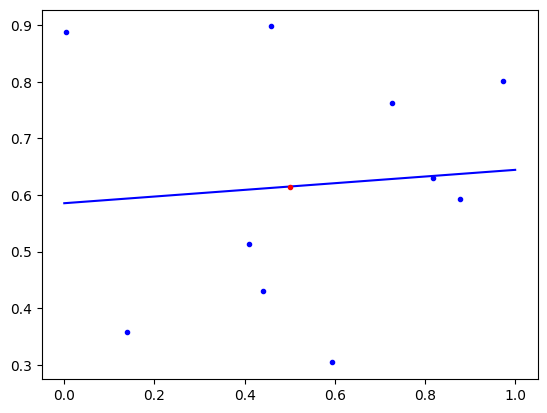

[[0.61509157]]


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

X = [[i] for i in np.random.random(10)]
y = [[i] for i in np.random.random(10)]

model = LinearRegression()

model.fit(X, y)

X_new = [[0.5]]
y_new = model.predict(X_new)

X_range = np.linspace(0, 1, 100).reshape(-1, 1)
y_range = model.predict(X_range)


plt.plot(X_range, y_range, 'b-')
plt.plot(X, y, 'b.')
plt.plot(X_new, y_new, 'r.')
plt.show()

print(y_new)

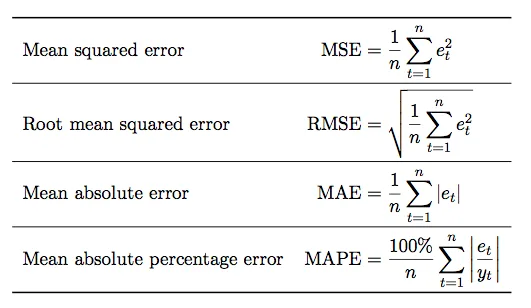

RMSE - Евклидова норма или норма вектора ||.||2

**MSE:**  сильнее штрафует большие ошибки, так как они возводятся в квадрат. Это делает MSE полезным, когда важно минимизировать большие ошибки. MSE может быть чрезмерно чувствителен к выбросам, что может исказить результаты.

MSE часто используется в оптимизационных задачах, так как его производная проста и удобна для градиентного спуска.

**RMSE:** используем когда мало выбросов

**MAE**: используем когда предпологаем что выбросов много

**MAPE**: выражается в процентах, что делает его легко интерпретируемым и понятным. MAPE может быть чрезмерно чувствителен к малым значениям фактических данных, так как деление на малое число может привести к очень большим значениям ошибки.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
import tarfile
import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url = HOUSING_URL, housing_path = HOUSING_PATH):
  os.makedirs(housing_path, exist_ok=True)
  tgz_path = os.path.join(housing_path, "housing.tgz")
  urllib.request.urlretrieve(housing_url, tgz_path)
  housing_tgz = tarfile.open(tgz_path)
  housing_tgz.extractall(path=housing_path)
  housing_tgz.close()

fetch_housing_data()

In [4]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
  csv_path = os.path.join(housing_path, "housing.csv")
  return pd.read_csv(csv_path)

housing = load_housing_data()

housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing["ocean_proximity"].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


std - стандартное отклонение

25,50,75 квартили

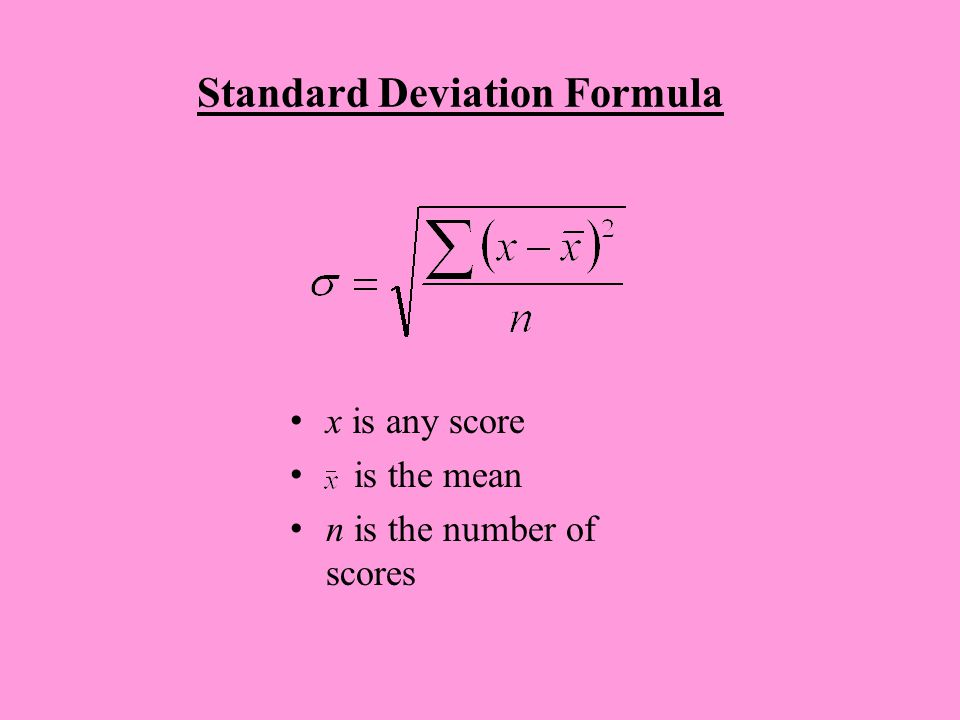

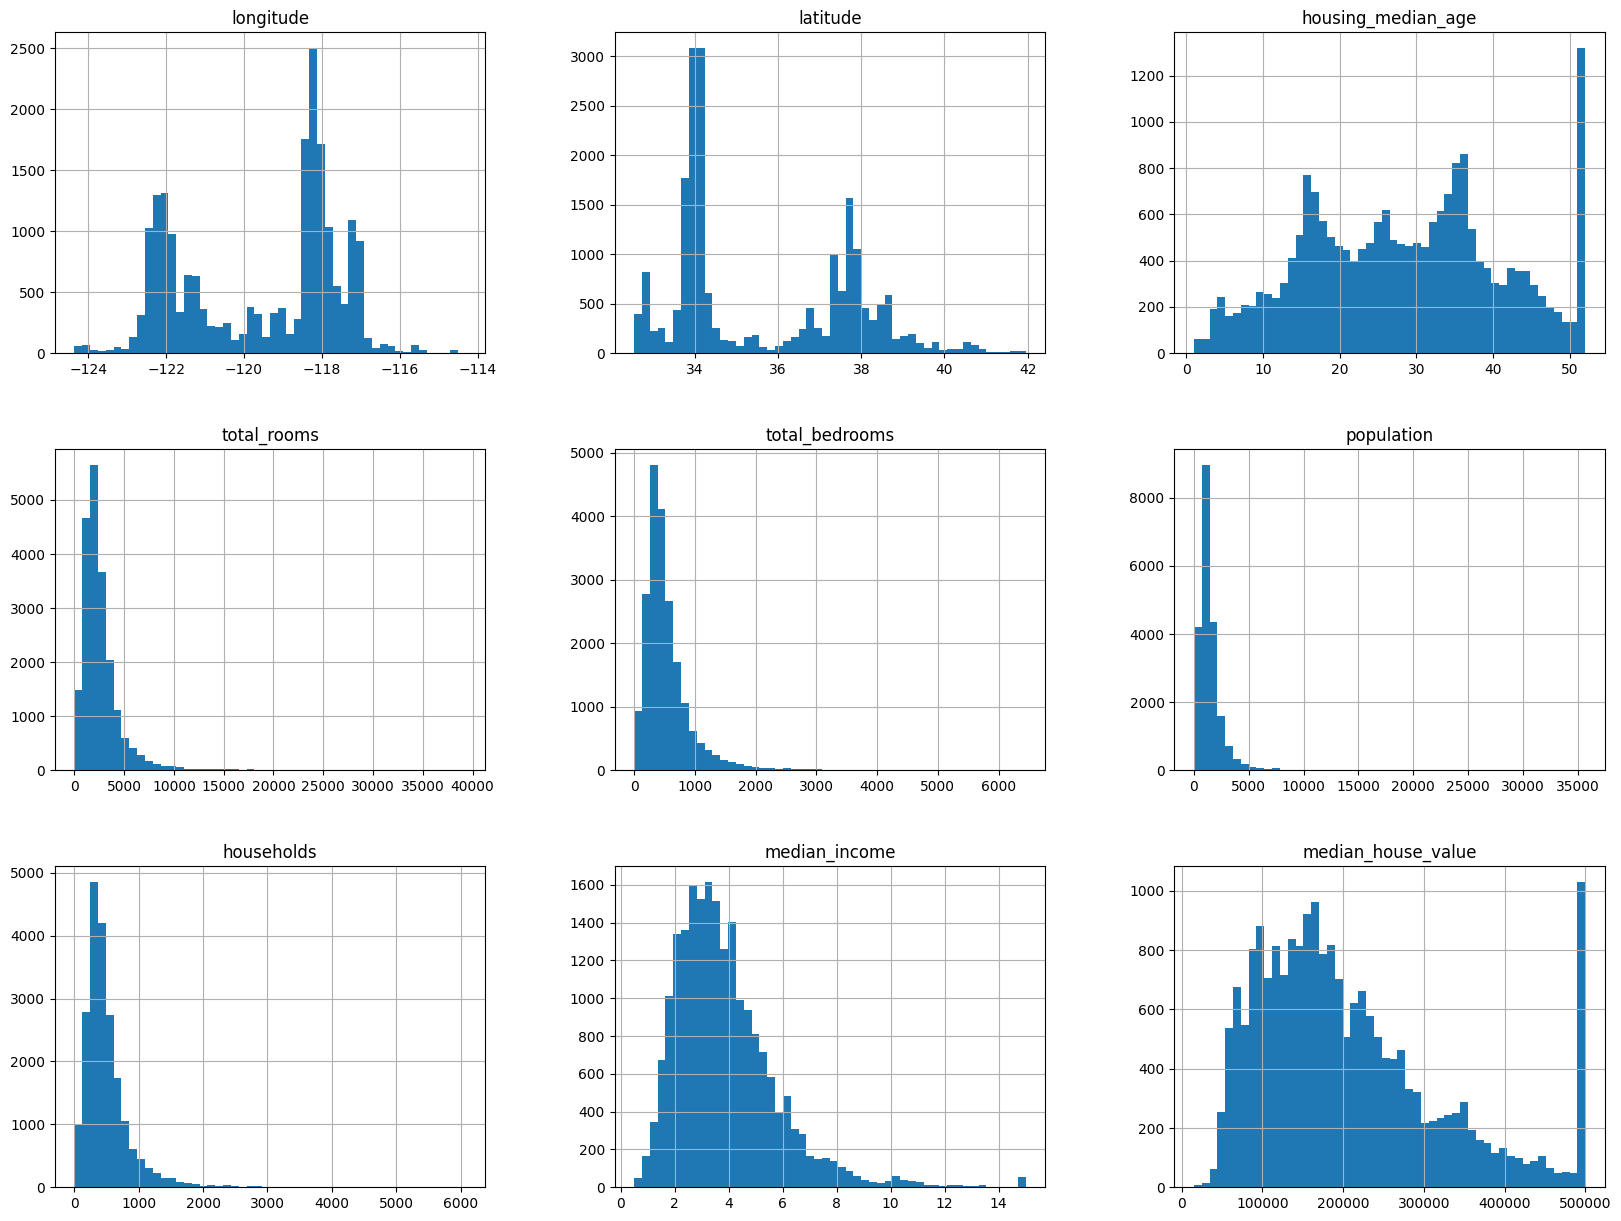

In [8]:
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(20,15))
plt.show()

In [9]:
import numpy as np

np.random.seed(42) # пока одно число последовательность сохранится

def split_train_test(data, test_ratio):
  shuffled_indeces = np.random.permutation(len(data)) # рандомит числа до указанного числа
  print(shuffled_indeces[:10])
  test_set_size = int(len(data) * test_ratio)
  test_indeces = shuffled_indeces[:test_set_size]
  train_indeces = shuffled_indeces[test_set_size:]
  # вернет все данные по указанным индексам.(data.iloc[0], информация о элементе с индексом 0)
  return data.iloc[train_indeces], data.iloc[test_indeces]

train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set),len(test_set))

[20046  3024 15663 20484  9814 13311  7113  7668 18246  5723]
16512 4128


np.random.seed(42) - при каждом вызове функций генерации случайных чисел (например, np.random.rand(), np.random.randn(), np.random.randint() и т.д.) будет генерироваться одна и та же последовательность чисел, если начальное значение (seed) остается неизменным.

[42 пояснение](https://ru.wikipedia.org/wiki/Ответ_на_главный_вопрос_жизни,_вселенной_и_всего_такого)

Хеш-функция

In [10]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
  return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
  ids = data[id_column]
  in_test_set = ids.apply(lambda id_:test_set_check(id_,test_ratio))
  return data.loc[~in_test_set], data.loc[in_test_set]

data.loc[~in_test_set]: Выбирает строки, которые не должны быть включены в тестовый набор (обучающий набор)

in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio)): Применяет функцию test_set_check к каждому идентификатору в столбце ids. Результат — это Series булевых значений, где True означает, что строка должна быть включена в тестовый набор.

In [11]:
housing_with_id = housing.reset_index()
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")
print(len(train_set),len(test_set))

16512 4128


In [12]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42) # random_state тот же seed
print(len(train_set),len(test_set))

16512 4128


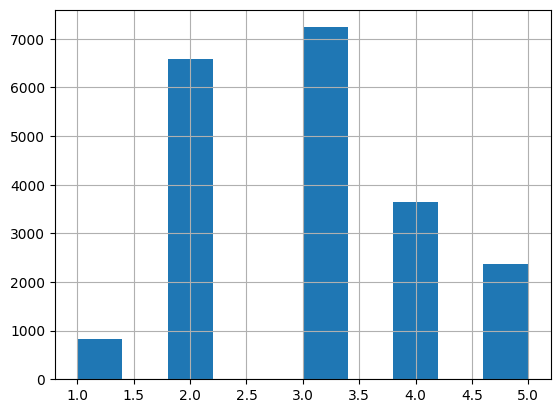

In [13]:
housing["income_cat"] = pd.cut( # pd.cut разбивает данные на интервалы (бины) и присваивает каждому значению соответствующую метку
    housing["median_income"],
    bins = [0., 1.5, 3.0, 4.5, 6.0, np.inf],
    labels = [1, 2, 3, 4, 5]
)

housing["income_cat"].hist()
plt.show()

bins:

0.: Нижняя граница первого интервала.
1.5: Верхняя граница первого интервала и нижняя граница второго интервала.
3.0: Верхняя граница второго интервала и нижняя граница третьего интервала.
4.5: Верхняя граница третьего интервала и нижняя граница четвертого интервала.
6.0: Верхняя граница четвертого интервала и нижняя граница пятого интервала.
np.inf: Верхняя граница пятого интервала (бесконечность).
labels: Список меток для каждого интервала. В данном случае:

1: Метка для интервала [0., 1.5).
2: Метка для интервала [1.5, 3.0).
3: Метка для интервала [3.0, 4.5).
4: Метка для интервала [4.5, 6.0).
5: Метка для интервала [6.0, np.inf)

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit # стратифицированная выборка

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing, housing["income_cat"]):
  strat_train_set = housing.loc[train_index]
  strat_test_set = housing.loc[test_index]

# удаляем атрибут income_cat, для возвратав первоначальное состояние
for set_ in (strat_train_set, strat_test_set):
  set_.drop("income_cat", axis=1, inplace=True)

 Стратифицированная выборка гарантирует, что обучающий и тестовый наборы данных будут содержать одинаковое распределение категорий, что особенно полезно, когда данные имеют неравномерное распределение по категориям.

 n_splits=1: Указывает, что данные будут разделены на обучающий и тестовый наборы только один раз.

 split.split(housing, housing["income_cat"]): Метод split возвращает генератор, который создает индексы для обучающего и тестового наборов. Параметры:

housing: DataFrame с данными.
housing["income_cat"]: Столбец, содержащий категории, по которым будет выполняться стратификация.

стратифицированная выборка сохраняет пропорции категорий в обоих наборах, что полезно для задач, где важно сохранить распределение категорий в обучающем и тестовом наборах

Исходный набор данных:

400 девушек (40%)
600 мужчин (60%)
Обучающий набор (80% от исходного набора):

80% от 400 девушек = 320 девушек
80% от 600 мужчин = 480 мужчин
Тестовый набор (20% от исходного набора):

20% от 400 девушек = 80 девушек
20% от 600 мужчин = 120 мужчин

In [15]:
# копия набора
housing = strat_train_set.copy()

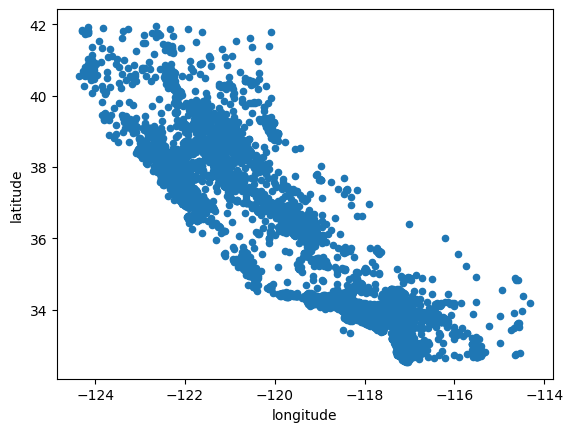

In [16]:
housing.plot(kind="scatter", x="longitude", y='latitude')
plt.show()

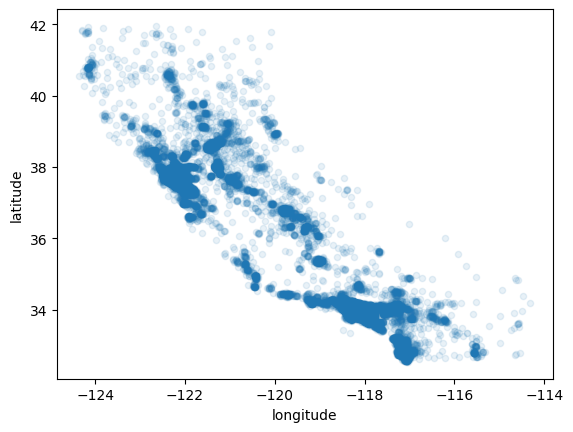

In [17]:
# alpha уменьшает плотность большого скопления точек
housing.plot(kind="scatter", x="longitude", y='latitude', alpha=0.1)
plt.show()

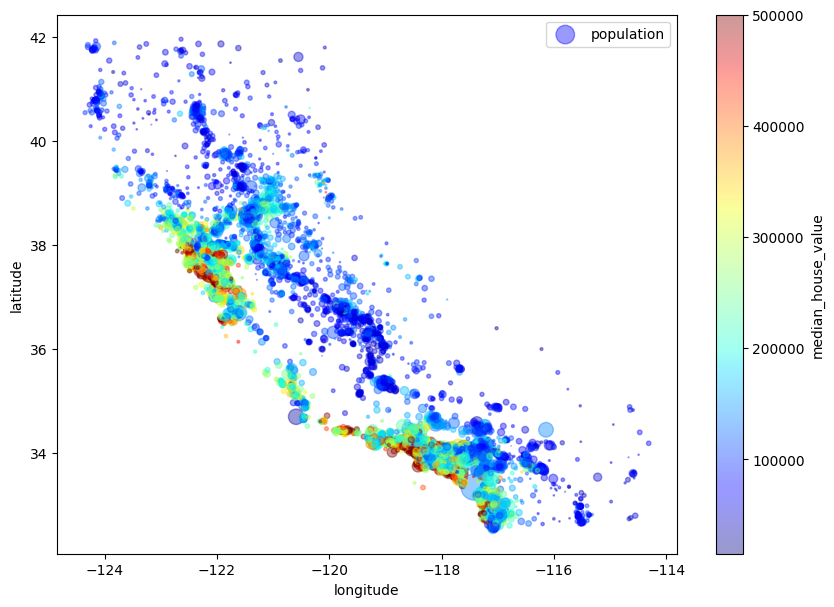

In [18]:
# s население округа, c = цена
housing.plot(
    kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap="jet", colorbar=True
)
plt.legend()
plt.show()

In [19]:
# Исключение нечисловых столбцов
numeric_housing = housing.select_dtypes(include=[np.number])

# Вычисление корреляции
corr_matrix = numeric_housing.corr()

# Сортировка корреляций по столбцу 'median_house_value'
sorted_corr = corr_matrix["median_house_value"].sort_values(ascending=False)
sorted_corr

,median_house_value
median_house_value,1.000000
median_income,0.687151
total_rooms,0.135140
housing_median_age,0.114146
households,0.064590
total_bedrooms,0.047781
population,-0.026882
longitude,-0.047466
latitude,-0.142673


Если корреляция отрицательна, это означает, что между двумя переменными существует обратная зависимость. То есть, когда одна переменная увеличивается, другая переменная уменьшается, и наоборот.

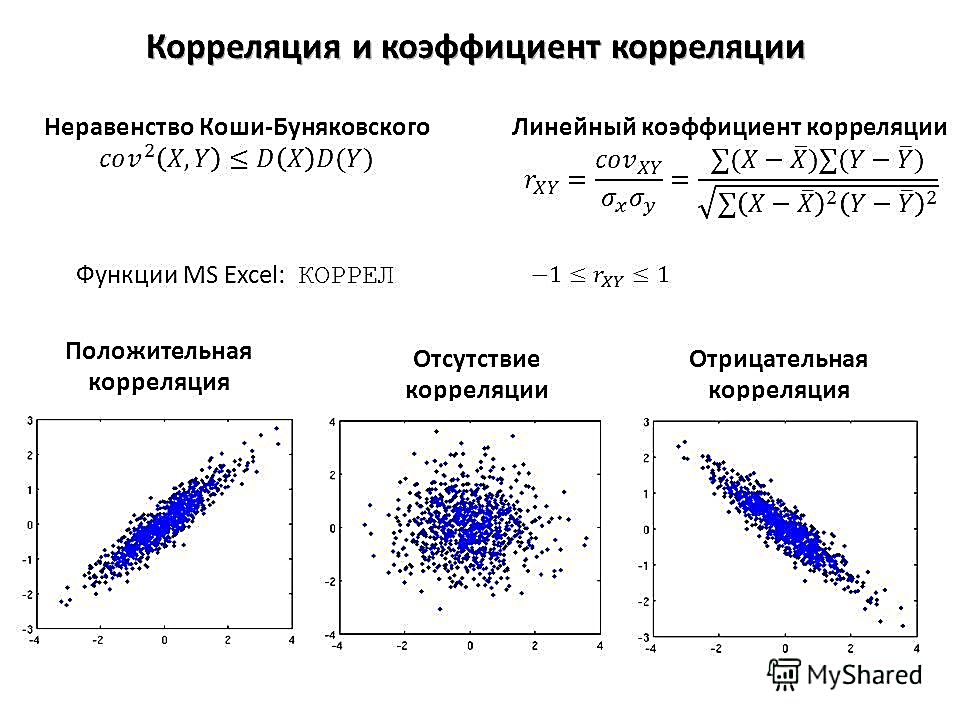

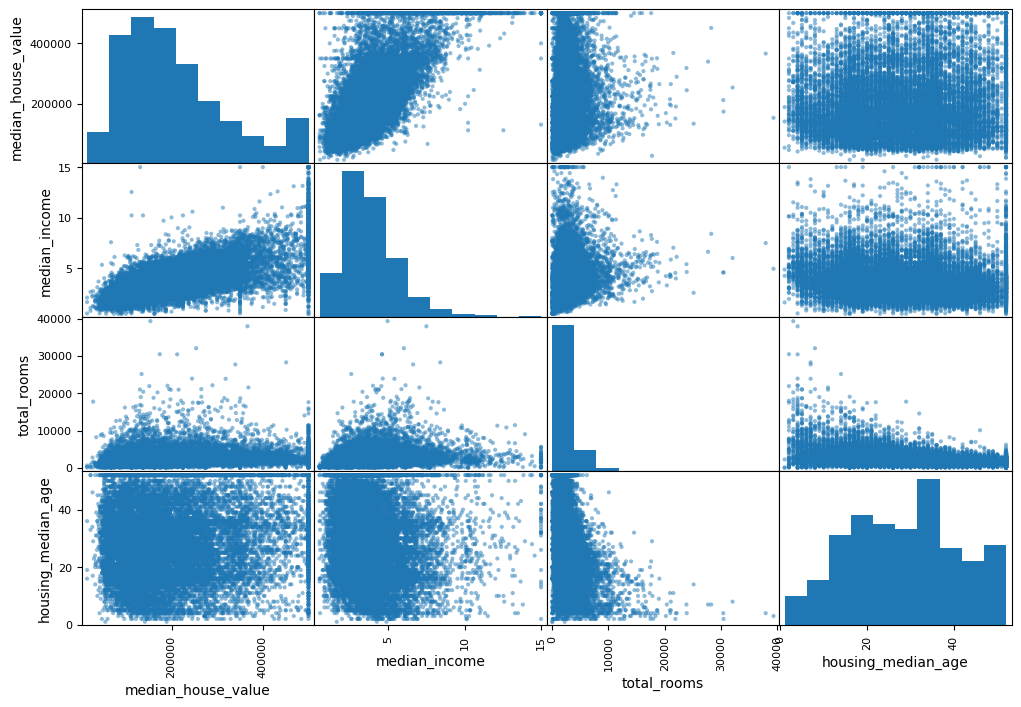

In [20]:
from pandas.plotting import scatter_matrix

atributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[atributes], figsize=(12,8))
plt.show()

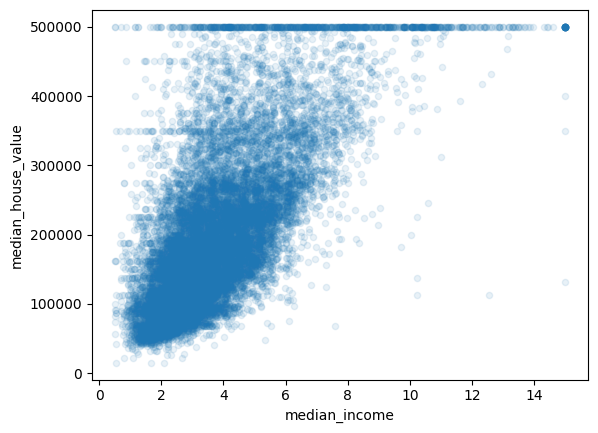

In [21]:
housing.plot(
    kind="scatter", x="median_income", y="median_house_value", alpha=0.1
)
plt.show()

In [22]:
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = housing["population"] / housing["households"]

In [23]:
numeric_housing = housing.select_dtypes(include=[np.number])
corr_matrix = numeric_housing.corr()

corr_matrix["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.687151
rooms_per_household,0.146255
total_rooms,0.135140
housing_median_age,0.114146
households,0.064590
total_bedrooms,0.047781
population_per_household,-0.021991
population,-0.026882
longitude,-0.047466


In [24]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [25]:
housing.dropna(subset=["total_bedrooms"])
housing.drop("total_bedrooms", axis=1)
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median, inplace=True) # Пропущенные значения (NaN) в столбце total_bedrooms заполняются медианным значением.

<ipython-input-25-aba9619116cc>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing["total_bedrooms"].fillna(median, inplace=True) # Пропущенные значения (NaN) в столбце total_bedrooms заполняются медианным значением.


In [26]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [27]:
housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)

print(imputer.statistics_) # медианные значения каждого столбца
print(housing_num.median().values) # медианные значения каждого столбца

[-118.51      34.26      29.      2119.       433.      1164.
  408.         3.54155]
[-118.51      34.26      29.      2119.       433.      1164.
  408.         3.54155]


In [28]:
X = imputer.transform(housing_num)

In [29]:
# X - np.array, переводим в pd.DataFrame
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

In [30]:
from sklearn.preprocessing import OrdinalEncoder

housing_cat = housing[["ocean_proximity"]]

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

OrdinalEncoder: Сохраняет порядок категорий, если он задан.

LabelEncoder: Не сохраняет порядок категорий.

Создание и применение OrdinalEncoder с явным порядком категорий

ordinal_encoder = OrdinalEncoder(categories=[['high_school', 'bachelor', 'master']]) # категории будут high_scool:0 , bachelor:1 и т.д

df['education_encoded'] = ordinal_encoder.fit_transform(df[['education']])

In [31]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

Проблема в методе оценки, 0 и 4 находятся далеко друг от друга, хотя для оценок 2,3,4,5 это хоррошее условия

Для устранения вышесказзаной проблемы используем **one-hot-encoding** - кодирование с одним активным состоянием

In [32]:
from sklearn.preprocessing import OneHotEncoder
# Метод fit_transform из библиотеки scikit-learn не изменяет исходный DataFrame напрямую
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

Выход разреженная матрица SciPy, а не массив numpy

Разреженная матрица (sparse matrix) — это матрица, в которой большинство элементов равны нулю. Вместо хранения всех элементов матрицы, разреженные матрицы хранят только ненулевые элементы и их позиции.

In [33]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [34]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

Масштабирование

Minmax - нормализация MinMaxScaler, есть features_range, чтобы диапазон не был от 0 до 1

StandartScaler, меьнше подвержен выбросам

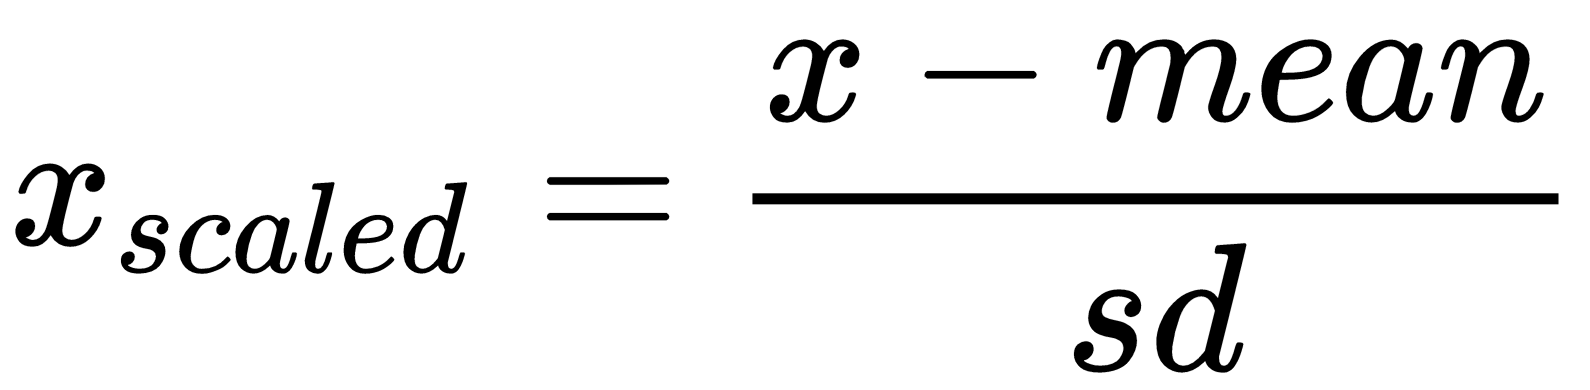

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

new_pipeline =  Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ("std_scaler", StandardScaler()),
])

housing_num_tr = new_pipeline.fit_transform(housing_num)

In [36]:
from sklearn.compose import ColumnTransformer

new_attribs = list(housing_num) # получаем названия столбцов
cat_attribs = ["ocean_proximity"]

# ColumnTransformer, сам найдет у подаваемого pd.DataFrame столбцы и их обработает
full_pipeline = ColumnTransformer([
    ("num", new_pipeline, new_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
])

housing_prepared = full_pipeline.fit_transform(housing)

In [37]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [38]:
some_data = housing.iloc[:5] # индексы iloc
some_labels = housing_labels[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Прогнозы:", lin_reg.predict(some_data_prepared))
print("Метки:", list(some_labels))

Прогнозы: [ 88983.14806384 305351.35385026 153334.71183453 184302.55162102
 246840.18988841]
Метки: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [39]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

69050.56219504567

In [40]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [41]:
housing_predictions = tree_reg.predict(housing_prepared) # модель переобучена
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_mse

0.0

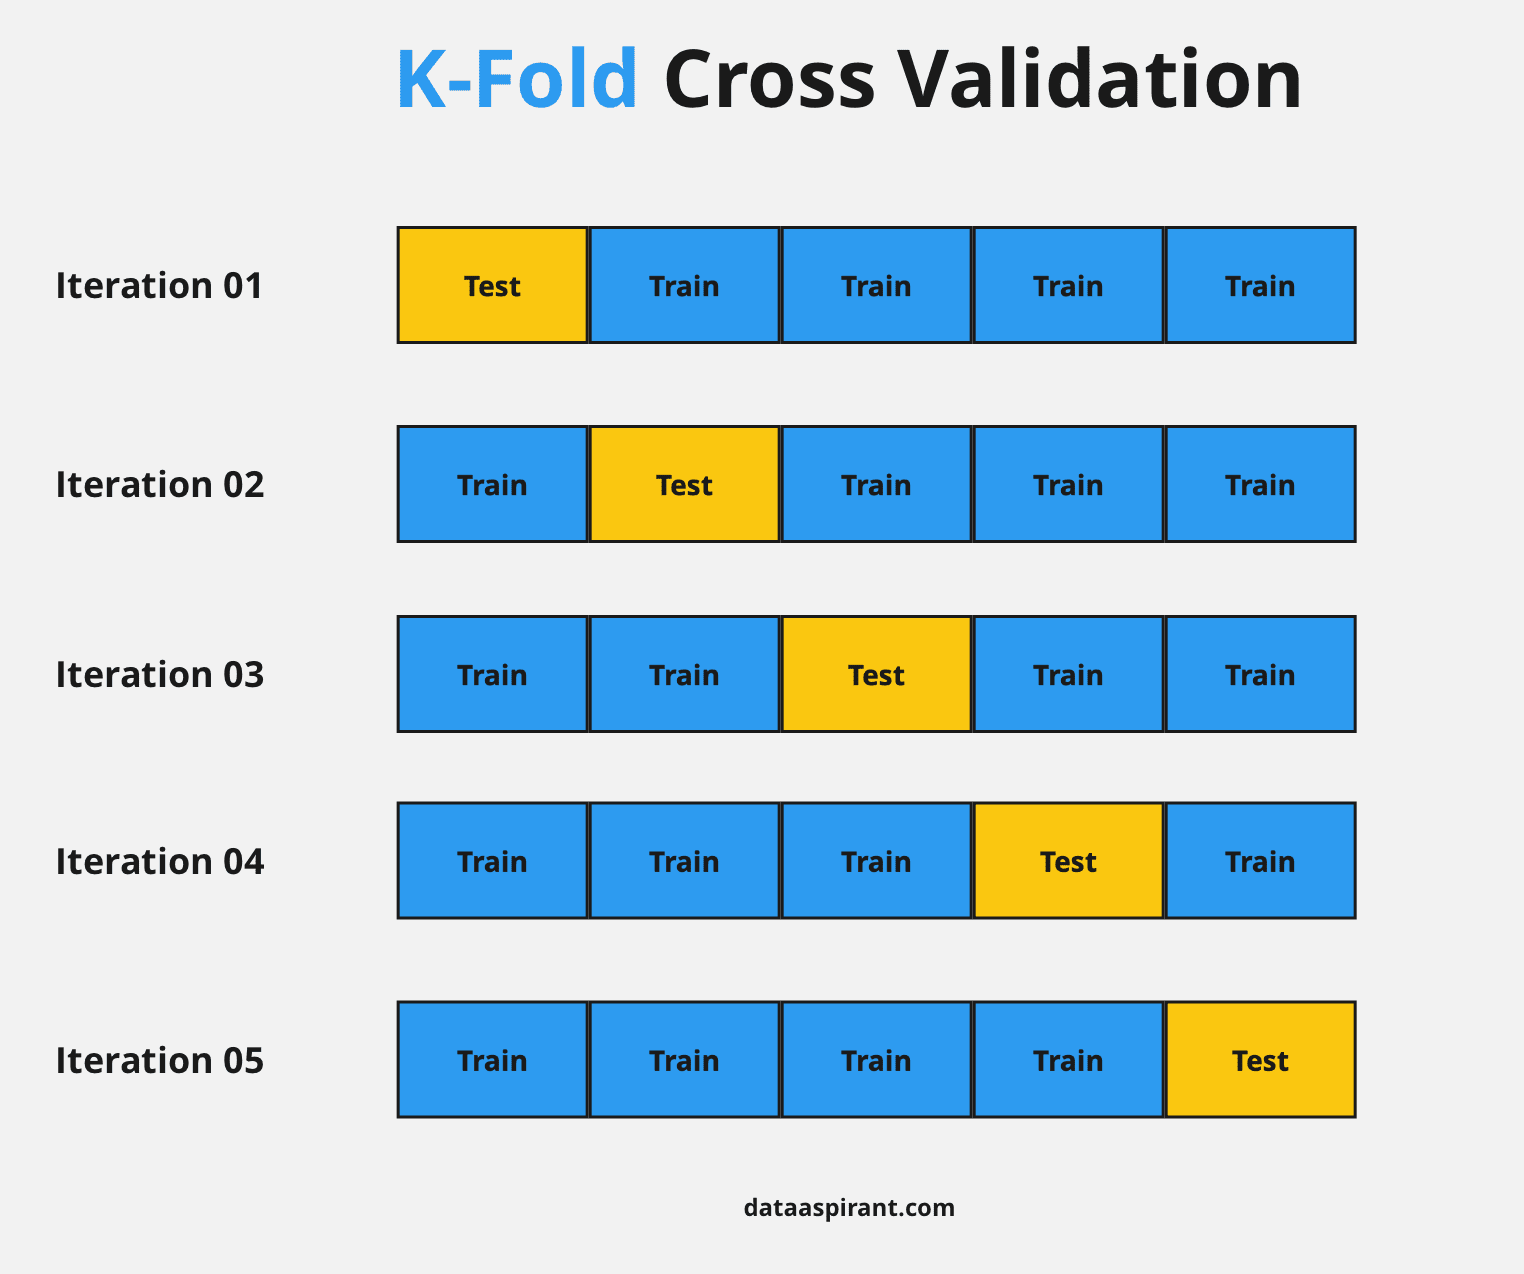

In [42]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(
    tree_reg,
    housing_prepared,
    housing_labels,
    # противоположность mse, больше значит лучше
    scoring="neg_mean_squared_error", cv=10 # на 10 частей разобъем, выше пример на 5 частей
)
tree_rmse_scores = np.sqrt(-scores)

In [43]:
def display_scores(scores):
  print("Суммы оценок:", scores)
  print("Среднее:", scores.mean())
  print("std:", scores.std())

display_scores(tree_rmse_scores)

Суммы оценок: [71287.22859964 70767.72084507 64280.74395215 69518.88357844
 68251.21864786 68129.75802077 73227.37280032 71027.55877847
 67296.63110803 69960.57455574]
Среднее: 69374.76908865155
std: 2379.4156811319704


In [44]:
lin_scores = cross_val_score(
    lin_reg,
    housing_prepared,
    housing_labels,
    scoring="neg_mean_squared_error", cv=10
)

lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Суммы оценок: [72229.03469752 65318.2240289  67706.39604745 69368.53738998
 66767.61061621 73003.75273869 70522.24414582 69440.77896541
 66930.32945876 70756.31946074]
Среднее: 69204.32275494763
std: 2372.070791055922


In [45]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()

forest_scores = cross_val_score(
    forest_reg,
    housing_prepared,
    housing_labels,
    scoring="neg_mean_squared_error", cv=10
)

forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Суммы оценок: [50416.86305005 49331.12474724 45835.25697395 50645.79642121
 47390.53721028 48933.81853643 51568.25255462 48803.88463263
 47640.37357354 53221.82366638]
Среднее: 49378.77313663466
std: 2056.895958968965


Сохранение модели

In [46]:
# import joblib

# joblib.dump(my_model, "my_model.pkl")

# my_model_loaded = joblib.load("my_model.pkl")

In [47]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators':[3, 10, 30], "max_features":[2, 4, 6, 8]},
    {"bootstrap":[False], "n_estimators":[3, 10], "max_features":[2, 3, 4]},
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(
    forest_reg, param_grid, cv=5,
    scoring="neg_mean_squared_error", return_train_score=True
)

grid_search.fit(housing_prepared,housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

n_estimators: Количество деревьев в лесу. Значения: 3, 10, 30. Увеличение количества деревьев обычно улучшает производительность модели, но также увеличивает время обучения и предсказания. Количество ансамблей

max_features: Максимальное количество признаков, рассматриваемых для разделения в каждом узле. Значения: 2, 4, 6, 8. сколько признаков будет рассматриваться для каждого разделения в дереве

bootstrap: Указывает, следует ли использовать бутстрап-выборки при построении деревьев. Значение: False.

Каждое дерево обучается на всем наборе данных. bootstrap: [False]

In [48]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [49]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [50]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  print(np.sqrt(-mean_score), params)

62855.39955800625 {'max_features': 2, 'n_estimators': 3}
54756.55509404886 {'max_features': 2, 'n_estimators': 10}
52570.499921518895 {'max_features': 2, 'n_estimators': 30}
60001.946234394636 {'max_features': 4, 'n_estimators': 3}
52971.07962927176 {'max_features': 4, 'n_estimators': 10}
50726.1626854139 {'max_features': 4, 'n_estimators': 30}
58381.439183926406 {'max_features': 6, 'n_estimators': 3}
51895.991492365894 {'max_features': 6, 'n_estimators': 10}
50096.668381410986 {'max_features': 6, 'n_estimators': 30}
57539.66800745656 {'max_features': 8, 'n_estimators': 3}
51668.31214962795 {'max_features': 8, 'n_estimators': 10}
50121.46750263992 {'max_features': 8, 'n_estimators': 30}
61009.69475965993 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54165.920348309046 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59854.88524376514 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52052.60251343234 {'bootstrap': False, 'max_features': 3, 'n_estimators

In [51]:
features_importances = grid_search.best_estimator_.feature_importances_
features_importances

array([1.23229593e-01, 1.11600125e-01, 4.52291748e-02, 3.58417423e-02,
       2.99895399e-02, 4.35543695e-02, 2.87987489e-02, 4.17470679e-01,
       2.47973605e-02, 1.26865078e-01, 7.52050063e-05, 5.26949657e-03,
       7.27888892e-03])

In [52]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = extra_attribs + cat_one_hot_attribs
sorted(zip(features_importances, attributes), reverse=True)

[(0.4174706786706476, 'NEAR OCEAN'),
 (0.12322959255099969, 'rooms_per_hhold'),
 (0.11160012474894047, 'pop_per_hhold'),
 (0.045229174812977516, 'bedrooms_per_room'),
 (0.04355436952410012, 'ISLAND'),
 (0.035841742258235484, '<1H OCEAN'),
 (0.029989539914784546, 'INLAND'),
 (0.028798748860578035, 'NEAR BAY')]

In [53]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

47416.01350453415

Ошибка обобщения — это разница между производительностью модели на тренировочных данных и ее производительностью на новых, невиданных данных. Она измеряет, насколько хорошо модель обобщает данные, которые она не видела во время обучения.

In [54]:
from scipy import stats
# 95% доверительный интервал, для ошибки обобщения
confidence = 0.95 # уверенность
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1, # Это количество степеней свободы (degrees of freedom) для t-распределения
                         loc=squared_errors.mean(), # это среднее значение квадратичных ошибок
                         scale=stats.sem(squared_errors)))

array([45453.36677129, 49300.58947395])

t-распределение: t-распределение используется для оценки доверительного интервала, когда размер выборки небольшой и стандартное отклонение населения неизвестно. Оно учитывает неопределенность, связанную с оценкой стандартного отклонения на основе выборки.

Степени свободы (degrees of freedom): Количество степеней свободы определяет форму t-распределения. Оно равно количеству наблюдений минус один.

ошибка на неизвестных данных колеблется в интервале ([45598.39423598, 49332.39222589])

Сохранение обученной модели с помощью  joblib, и использование API REST

Развертывание модели в Google Cloud AI Platform

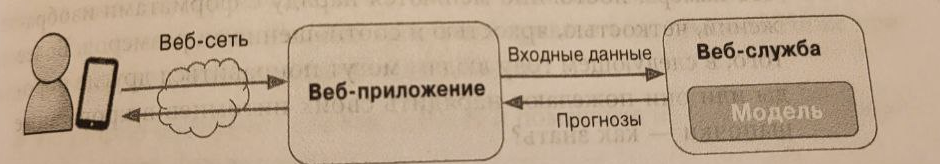

Упражнения: Сравнить набор housing на методе SVR

In [63]:
housing_test = housing.copy()

ord = OrdinalEncoder()
housing_test[["ocean_proximity"]] = ord.fit_transform(housing_test[["ocean_proximity"]])

X = housing_test
y = housing_labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
from sklearn.svm import SVR

svr_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ("std_scaler", StandardScaler()),
    ("svr", SVR()),
])

svr_pipeline.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('std_scaler', StandardScaler()), ('svr', SVR())])

In [65]:
pred = svr_pipeline.predict(X_test)
mse = mean_squared_error(y_test, pred)
np.sqrt(mse)

117474.97550846882

In [66]:
param_grid = {
    'svr__C': [0.1, 1, 10, 100],
    'svr__kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
}

grid_search = GridSearchCV(svr_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, pred)

rmse = np.sqrt(mse)

print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"RMSE: {rmse}")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
20 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
16 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 473, in fit
    self._final_estimator.fit(Xt, y, **last_step_params["fit"])
  File "/usr/local/lib/pyt

Лучшие параметры: {'svr__C': 100, 'svr__kernel': 'linear'}
RMSE: 72476.39113039238


In [67]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  print(np.sqrt(-mean_score), params)

118694.55112887568 {'svr__C': 0.1, 'svr__kernel': 'linear'}
119072.35329625502 {'svr__C': 0.1, 'svr__kernel': 'poly'}
119100.90113675619 {'svr__C': 0.1, 'svr__kernel': 'rbf'}
119079.53475339945 {'svr__C': 0.1, 'svr__kernel': 'sigmoid'}
nan {'svr__C': 0.1, 'svr__kernel': 'precomputed'}
114955.51347450716 {'svr__C': 1, 'svr__kernel': 'linear'}
118687.95136792066 {'svr__C': 1, 'svr__kernel': 'poly'}
118910.60872193874 {'svr__C': 1, 'svr__kernel': 'rbf'}
118722.91243219943 {'svr__C': 1, 'svr__kernel': 'sigmoid'}
nan {'svr__C': 1, 'svr__kernel': 'precomputed'}
91055.42135876036 {'svr__C': 10, 'svr__kernel': 'linear'}
116879.54237558667 {'svr__C': 10, 'svr__kernel': 'poly'}
117114.80282877521 {'svr__C': 10, 'svr__kernel': 'rbf'}
115202.63819469654 {'svr__C': 10, 'svr__kernel': 'sigmoid'}
nan {'svr__C': 10, 'svr__kernel': 'precomputed'}
74668.57617826127 {'svr__C': 100, 'svr__kernel': 'linear'}
105862.02219426075 {'svr__C': 100, 'svr__kernel': 'poly'}
102813.28260104303 {'svr__C': 100, 'svr__

In [70]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

param_distributions = {
    'svr__C': uniform(0.1, 10),
    'svr__epsilon': uniform(0.01, 1),
    'svr__kernel': ['linear', 'rbf', 'poly'],
    'svr__degree': randint(2, 4),  # Только для 'poly'
    'svr__gamma': ['scale', 'auto']
}

random_search = RandomizedSearchCV(svr_pipeline, param_distributions, n_iter=100, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)

random_search.fit(X_train, y_train)

best_model = random_search.best_estimator_

pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, pred)

rmse = np.sqrt(mse)

print(f"Лучшие параметры: {random_search.best_params_}")
print(f"RMSE: {rmse}")

Лучшие параметры: {'svr__C': 9.921683433294355, 'svr__degree': 3, 'svr__epsilon': 0.5396505783560065, 'svr__gamma': 'auto', 'svr__kernel': 'linear'}
RMSE: 86680.18294648366


In [71]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  print(np.sqrt(-mean_score), params)

118694.55112887568 {'svr__C': 0.1, 'svr__kernel': 'linear'}
119072.35329625502 {'svr__C': 0.1, 'svr__kernel': 'poly'}
119100.90113675619 {'svr__C': 0.1, 'svr__kernel': 'rbf'}
119079.53475339945 {'svr__C': 0.1, 'svr__kernel': 'sigmoid'}
nan {'svr__C': 0.1, 'svr__kernel': 'precomputed'}
114955.51347450716 {'svr__C': 1, 'svr__kernel': 'linear'}
118687.95136792066 {'svr__C': 1, 'svr__kernel': 'poly'}
118910.60872193874 {'svr__C': 1, 'svr__kernel': 'rbf'}
118722.91243219943 {'svr__C': 1, 'svr__kernel': 'sigmoid'}
nan {'svr__C': 1, 'svr__kernel': 'precomputed'}
91055.42135876036 {'svr__C': 10, 'svr__kernel': 'linear'}
116879.54237558667 {'svr__C': 10, 'svr__kernel': 'poly'}
117114.80282877521 {'svr__C': 10, 'svr__kernel': 'rbf'}
115202.63819469654 {'svr__C': 10, 'svr__kernel': 'sigmoid'}
nan {'svr__C': 10, 'svr__kernel': 'precomputed'}
74668.57617826127 {'svr__C': 100, 'svr__kernel': 'linear'}
105862.02219426075 {'svr__C': 100, 'svr__kernel': 'poly'}
102813.28260104303 {'svr__C': 100, 'svr__